In [9]:
# Make some plots like these for various values of zeta<=1
%matplotlib notebook
from numpy import *
from matplotlib.pyplot import *

In [10]:
def underdamped_solution(x0, c, k, m, phi, t):
    zeta = c/(2*sqrt(k*m))
    omega = sqrt(k/m)
    x_t = x0 * pow(e, -zeta*omega*t)*cos(sqrt(1-zeta*zeta)*omega*t - phi)
    return x_t
    

<IPython.core.display.Javascript object>


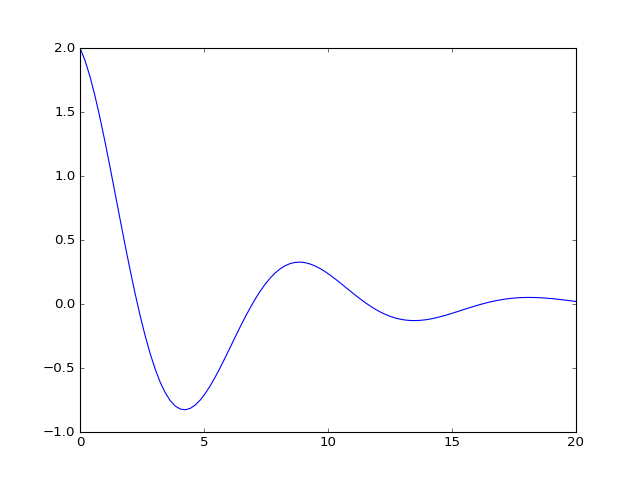

zeta: 0.282842712475


In [11]:
x0 = 2.0
k=1.0  # spring constant, kN/m
m=2.0  # mass, Kg
c=0.8  # damping coefficient 
phi = 0.0
t = linspace(0, 20, 100)
u = underdamped_solution(x0, c, k, m, phi, t)
plot(t, u)
show()
print('zeta:', c/(2*sqrt(k*m)))

<IPython.core.display.Javascript object>


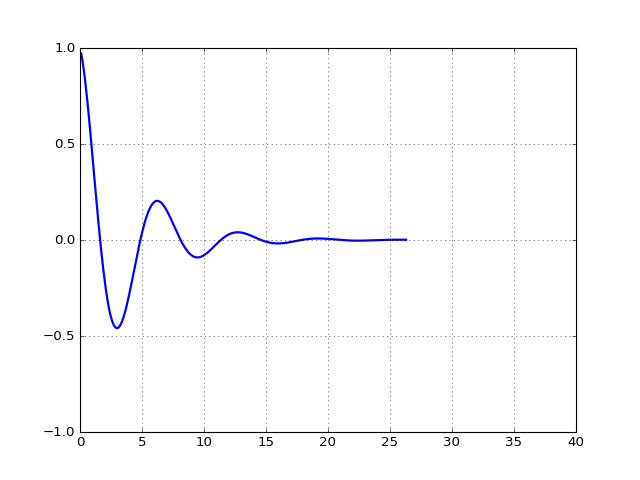

In [12]:
# Make an animated simulation of a bouncing ball modelled (invisible) as a mass-spring-damper system
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x0 = 1.0
k=1.0  # spring constant, kN/m
m=1.0  # mass, Kg
c=0.5  # damping coefficient 
phi = 0.0
        
def data_gen(t=0):
    cnt = 0
    zeta = c/(2*np.sqrt(k*m))
    omega = np.sqrt(k/m)
    while cnt < 1000:
        cnt += 1
        t += 0.1
        
        
        yield t, x0 * pow(np.e, -zeta*omega*t) * np.cos(np.sqrt(1-zeta*zeta)*omega*t - phi)#* np.exp(-t/10.)


def init():
    ax.set_ylim(-x0, x0)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

1


<IPython.core.display.Javascript object>


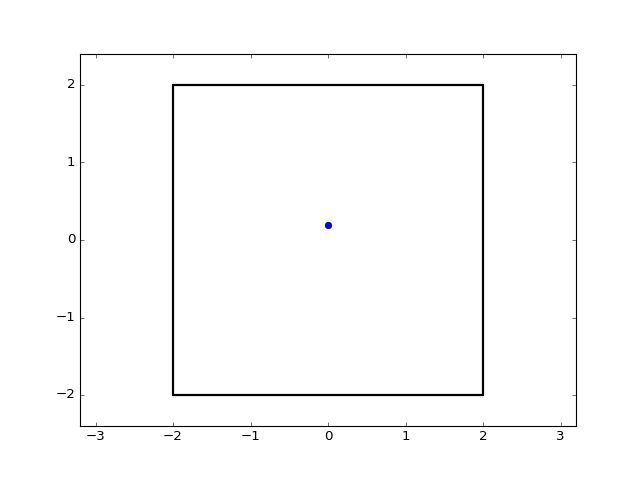

In [5]:
# A bouncing ball modelled (invisible) as a mass-spring-damper system 
%matplotlib notebook
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M #* np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        x0 = 2.0
        k=1.0  # spring constant, kN/m
        m=1.0  # mass, Kg
        c=0.05  # damping coefficient 
        phi = 0.0

        zeta = c/(2*np.sqrt(k*m))
        omega = np.sqrt(k/m)

        # print(x0 * pow(np.e, -zeta*omega*self.time_elapsed) * 
        #   np.cos(np.sqrt(1-zeta*zeta)*omega*self.time_elapsed - phi))
        self.state[:, 1] = x0 * pow(np.e, -zeta*omega*self.time_elapsed) * np.cos(np.sqrt(1-zeta*zeta)*omega*self.time_elapsed - phi)


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((1, 4))
# init_state = -0.5 + [[ 0.96366276,  0.38344152,  0.79172504,  0.52889492]]
# init_state[:, :2] *= 3.9

# init_state[0][2] = 0
init_state[0] = [0., 0., 0.0, 0.0]

box = ParticleBox(init_state, size=0.04)
# dt = 1. / 30 # 30fps
dt = 1. / 30

print(init_state.shape[0])

#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],  # origin position
                     box.bounds[1] - box.bounds[0], # width
                     box.bounds[3] - box.bounds[2], # height
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    # ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
    #          / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
#     particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)

plt.show()